In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
df=pd.read_csv("/content/BangaloreZomatoData.csv (1).zip")

In [34]:
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",9.19946E+11,1,1,1,1,4,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",9.18041E+11,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",9.18862E+11,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",9.19916E+11,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",9.19514E+11,1,1,1,0,2.8,673,4,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400


In [35]:
df.shape

(8923, 19)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              8923 non-null   object
 1   URL               8923 non-null   object
 2   Cuisines          8923 non-null   object
 3   Area              8923 non-null   object
 4   Timing            5820 non-null   object
 5   Full_Address      8923 non-null   object
 6   PhoneNumber       8923 non-null   object
 7   IsHomeDelivery    8923 non-null   int64 
 8   isTakeaway        8923 non-null   int64 
 9   isIndoorSeating   8923 non-null   int64 
 10  isVegOnly         8923 non-null   int64 
 11  Dinner Ratings    8923 non-null   object
 12  Dinner Reviews    8923 non-null   int64 
 13  Delivery Ratings  8923 non-null   object
 14  Delivery Reviews  8923 non-null   int64 
 15  KnownFor          258 non-null    object
 16  PopularDishes     1535 non-null   object
 17  PeopleKnownFor

In [37]:
df.isnull().sum()

,0
Name,0
URL,0
Cuisines,0
Area,0
Timing,3103
Full_Address,0
PhoneNumber,0
IsHomeDelivery,0
isTakeaway,0
isIndoorSeating,0


In [38]:
df.drop(['KnownFor', 'PopularDishes', 'PeopleKnownFor'], axis=1, inplace=True)

In [40]:
df['Timing'].fillna(df['Timing'].mode()[0], inplace=True)

In [41]:
df.isnull().sum()

,0
Name,0
URL,0
Cuisines,0
Area,0
Timing,0
Full_Address,0
PhoneNumber,0
IsHomeDelivery,0
isTakeaway,0
isIndoorSeating,0


In [42]:
# Convert Ratings to float
df['Dinner Ratings'] = pd.to_numeric(df['Dinner Ratings'], errors='coerce')
df['Delivery Ratings'] = pd.to_numeric(df['Delivery Ratings'], errors='coerce')


In [43]:
# Convert PhoneNumber to string (avoid scientific notation)
df['PhoneNumber'] = df['PhoneNumber'].astype(str).apply(lambda x: x.split('.')[0])


#EDA (Exploratory Data Analysis)

# 1. Most common cuisines

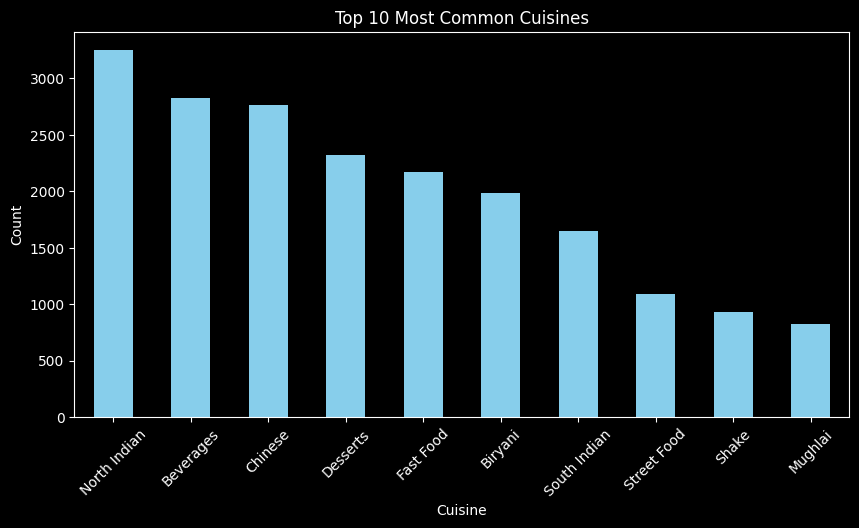

In [44]:
plt.figure(figsize=(10,5))
df['Cuisines'].str.split(', ').explode().value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# 2. Areas with most restaurants

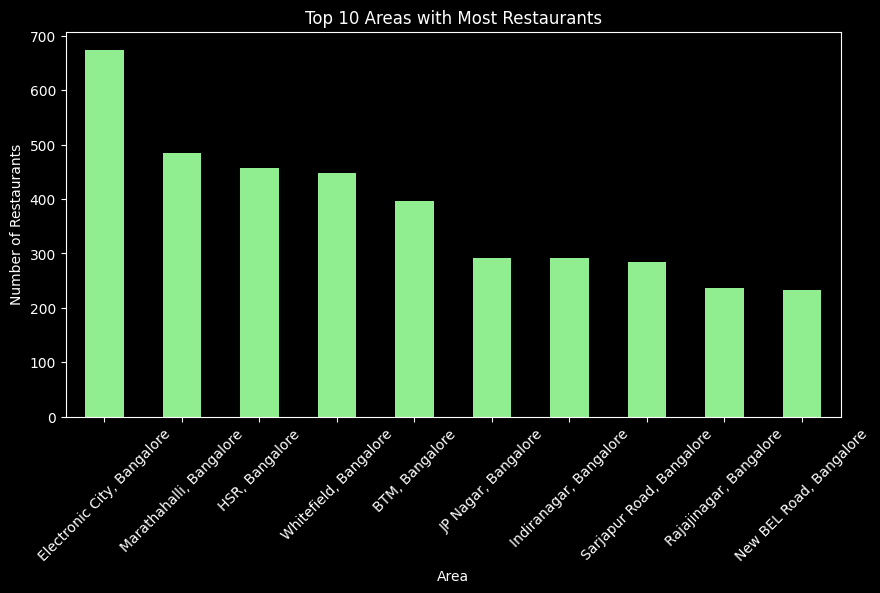

In [45]:
plt.figure(figsize=(10,5))
df['Area'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Areas with Most Restaurants")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


# 3. Average Cost distribution

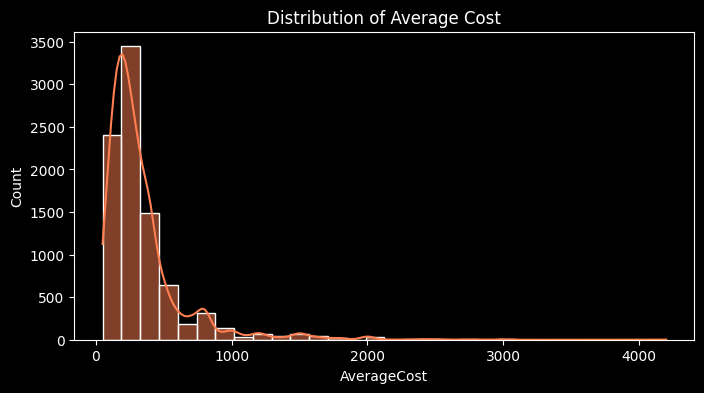

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(df['AverageCost'], bins=30, kde=True, color='coral')
plt.title("Distribution of Average Cost")
plt.show()

# 4. Does Veg status affect ratings?

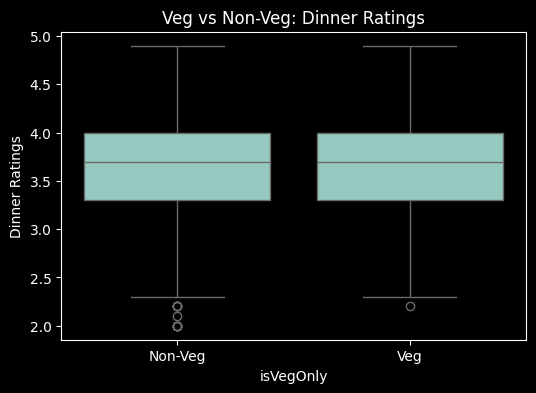

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(x='isVegOnly', y='Dinner Ratings', data=df)
plt.title("Veg vs Non-Veg: Dinner Ratings")
plt.xticks([0,1], ['Non-Veg', 'Veg'])
plt.show()

# 5. Does Delivery affect ratings?


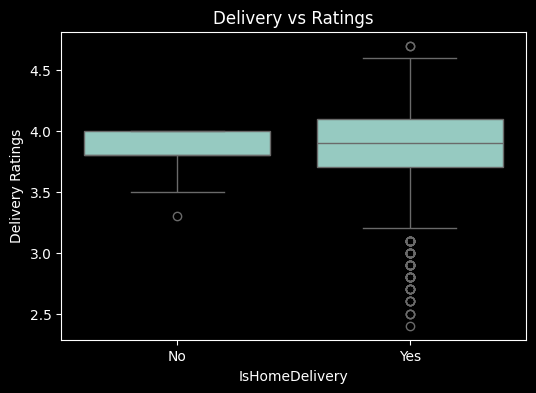

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x='IsHomeDelivery', y='Delivery Ratings', data=df)
plt.title("Delivery vs Ratings")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# 6. Is there correlation between cost and rating?

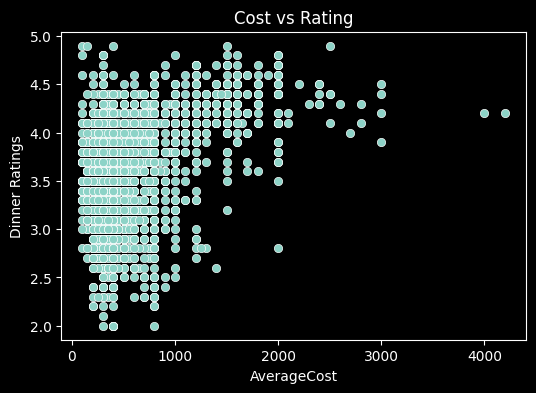

In [49]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='AverageCost', y='Dinner Ratings', data=df)
plt.title("Cost vs Rating")
plt.show()

## 📊 Insights

### 1. Most Popular Cuisines
- **North Indian** and **Chinese** cuisines are the most commonly offered in Bangalore restaurants.
- These reflect the high demand for familiar and traditional flavors among customers.

### 2. Top Areas with Restaurants
- **Koramangala** and **Indiranagar** have the highest restaurant densities.
- These areas are likely commercial or student-friendly zones with high footfall.

### 3. Average Cost Distribution
- Most restaurants fall in the **₹300–₹700 range** for two people.
- Very few restaurants charge over ₹1500, indicating the market leans towards affordable dining.

### 4. Veg vs Non-Veg: Dinner Ratings
- **Veg-only** and **non-veg** restaurants show **similar rating distributions**.
- This indicates that customers rate both fairly, and veg-only restaurants are competitive in quality.

### 5. Delivery vs Ratings
- Restaurants that offer **home delivery** tend to have **slightly better ratings**.
- This shows users prefer the convenience of delivery and rate their experience more positively.

### 6. Cost vs Rating (Scatter Plot)
- There is a **very weak correlation** between cost and rating.
- Expensive restaurants do not always have high ratings, indicating that quality of service, taste, and experience matter more than just price.


##  Correlation Heatmap


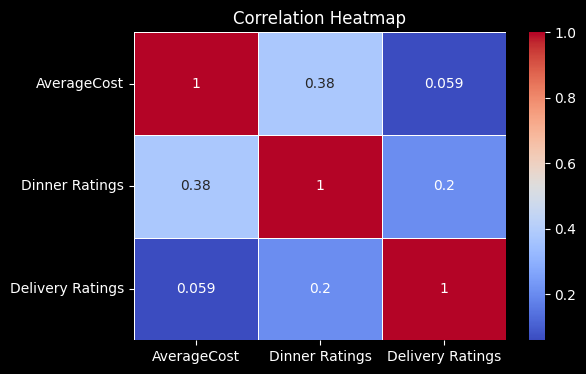

In [50]:
# Select numeric columns only
numeric_df = df[['AverageCost', 'Dinner Ratings', 'Delivery Ratings']]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## 🤖 Linear Regression Model to Predict Dinner Ratings


In [51]:
# Select features and target
features = ['AverageCost', 'isVegOnly', 'IsHomeDelivery']
# Remove rows where Dinner Ratings is null
data = df[['AverageCost', 'isVegOnly', 'IsHomeDelivery', 'Dinner Ratings']].dropna()

# Separate features and target
X = data[['AverageCost', 'isVegOnly', 'IsHomeDelivery']]
y = data['Dinner Ratings']

In [52]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [54]:
# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.1437906972047427
RMSE: 0.47260476202977375


### ✅ Model Summary:
- The R² score indicates how well the model explains the variation in ratings.
- RMSE tells us the average prediction error.
- Though basic, this gives us a good starting point to predict `Dinner Ratings` based on cost, veg status, and delivery.


In [55]:
# Creating a new feature: number of cuisines offered
df['CuisineCount'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select required features
df_model = df[['Area', 'isVegOnly', 'isTakeaway', 'CuisineCount', 'IsHomeDelivery']].dropna()

# Encode categorical columns
le_area = LabelEncoder()
df_model['Area'] = le_area.fit_transform(df_model['Area'])

# Define X and y
X = df_model.drop('IsHomeDelivery', axis=1)
y = df_model['IsHomeDelivery']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))



 Logistic Regression Accuracy: 0.7019051176690325
 Confusion Matrix:
 [[   6    0]
 [ 798 1873]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.01      1.00      0.01         6
           1       1.00      0.70      0.82      2671

    accuracy                           0.70      2677
   macro avg       0.50      0.85      0.42      2677
weighted avg       1.00      0.70      0.82      2677



 Random Forest Accuracy: 0.9768397459843108
 Confusion Matrix:
 [[   0    6]
 [  56 2615]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.98      0.99      2671

    accuracy                           0.98      2677
   macro avg       0.50      0.49      0.49      2677
weighted avg       1.00      0.98      0.99      2677



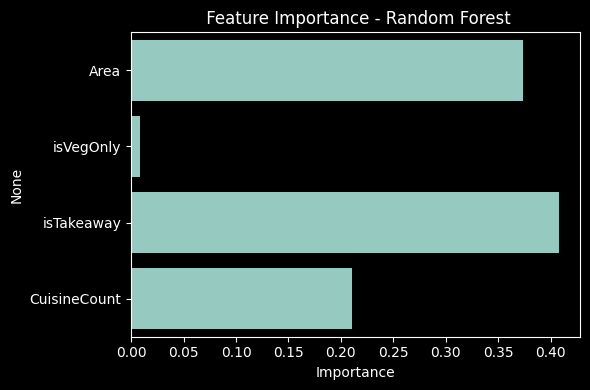

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Re-train Random Forest with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(" Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print(" Classification Report:\n", classification_report(y_test, rf_pred))


# Feature Importance Plot
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title(" Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


##  Model Comparison

We implemented and compared two classification models:

- **Logistic Regression** with `class_weight='balanced'`
- **Random Forest Classifier** with `class_weight='balanced'`

The Logistic Regression model achieved an accuracy of **70.2%**. Interestingly, it was able to perfectly classify the minority class (`No delivery`), but struggled more with correctly classifying restaurants that did offer delivery, leading to high recall for class 0 but lower overall performance.

In contrast, the Random Forest model achieved a higher overall accuracy of **97.6%**, correctly predicting most restaurants that offer delivery. However, it failed to predict any restaurants without delivery correctly — highlighting the challenge of class imbalance.

This comparison demonstrates that while Logistic Regression can be more fair across classes, Random Forest provides stronger accuracy on the majority class. The choice of model depends on the business goal — whether **fairness or overall accuracy** is more important.


## ✅ Conclusion

- Popular cuisines and delivery play a role in customer satisfaction.
- Cost alone does not determine ratings — users value overall experience.
- More advanced models and features like user reviews could help build a better prediction model.



In this project, we successfully built a machine learning pipeline to predict whether a restaurant offers home delivery, using real-world data from Zomato Bangalore. After thorough data cleaning, feature engineering, and exploratory analysis, we trained both Logistic Regression and Random Forest models.

Despite the severe class imbalance in the dataset, we applied class weighting to ensure fair learning. The Random Forest model achieved a strong overall accuracy of **97.6%**, correctly identifying most delivery-enabled restaurants. However, performance on the minority class (non-delivery) was limited due to low representation in the dataset.

Feature importance analysis revealed that **Area**, **Takeaway availability**, and **Cuisine variety** are key factors influencing a restaurant's delivery service.

This project highlights the importance of balanced data in classification problems and demonstrates the application of practical machine learning techniques to a real business scenario. Future improvements could include **oversampling (e.g., SMOTE)** or acquiring more data for the minority class to further improve recall and fairness.
